# **Dog Breed Prediction**

In [1]:
# !pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.utils import load_img, img_to_array
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [3]:
# od.download("https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp")

In [4]:
labels_all = pd.read_csv("dogbreedidfromcomp\labels.csv")

In [5]:
labels_all.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
print(labels_all.shape)

(10222, 2)


In [7]:
breeds_all = labels_all["breed"]
breed_count = breeds_all.value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [8]:
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all["breed"].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [9]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

In [10]:
X_data

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [11]:
Y_data

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [12]:
for i in tqdm(range(len(labels))):
    img = load_img('dogbreedidfromcomp/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:01<00:00, 350.94it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [13]:
model = Sequential()

model.add(Conv2D(filters = 64, 
                 kernel_size=(5,5), 
                 activation="relu",
                 input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 activation="relu",
                 kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16,
                 kernel_size=(7,7),
                 activation="relu",
                 kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8,
                 kernel_size=(5,5),
                 activation="relu",
                 kernel_regularizer="l2"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu", kernel_regularizer="l2"))
model.add(Dense(64,activation="relu", kernel_regularizer="l2"))
model.add(Dense(len(CLASS_NAMES), activation="softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = Adam(0.0001), 
              metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [14]:
CLASS_NAMES

['scottish_deerhound', 'maltese_dog', 'bernese_mountain_dog']

In [15]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [17]:
epochs = 80
batch_size=64

history = model.fit(X_train, Y_train, 
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/80
4/4 [==============================] - 12s 3s/step - loss: 4.2213 - accuracy: 0.6875 - val_loss: 4.3385 - val_accuracy: 0.5385
Epoch 2/80
4/4 [==============================] - 11s 3s/step - loss: 4.1588 - accuracy: 0.6797 - val_loss: 4.3508 - val_accuracy: 0.5077
Epoch 3/80
4/4 [==============================] - 11s 3s/step - loss: 4.0993 - accuracy: 0.7070 - val_loss: 4.2989 - val_accuracy: 0.5077
Epoch 4/80
4/4 [==============================] - 11s 3s/step - loss: 4.0492 - accuracy: 0.6992 - val_loss: 4.3426 - val_accuracy: 0.5231
Epoch 5/80
4/4 [==============================] - 11s 3s/step - loss: 4.0464 - accuracy: 0.6797 - val_loss: 4.2519 - val_accuracy: 0.4923
Epoch 6/80
4/4 [==============================] - 11s 3s/step - loss: 3.9584 - accuracy: 0.7266 - val_loss: 4.3352 - val_accuracy: 0.5231
Epoch 7/80
4/4 [==============================] - 11s 3s/step - loss: 3.9373 - accuracy: 0.7266 - val_loss: 4.1872 - val_accuracy: 0.5077
Epoch 8/80
4/4 [==================

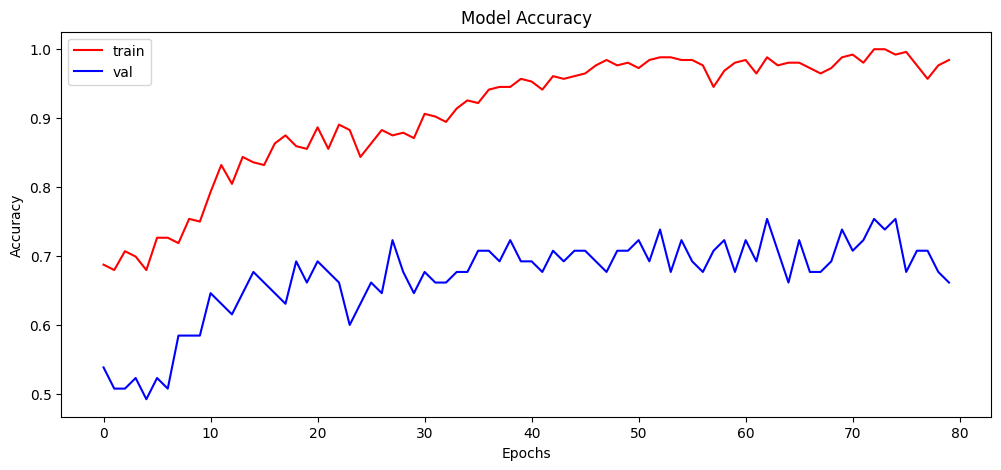

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [19]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 36ms/step - loss: 3.6598 - accuracy: 0.6389
Accuracy over the test set: 
  63.89 %


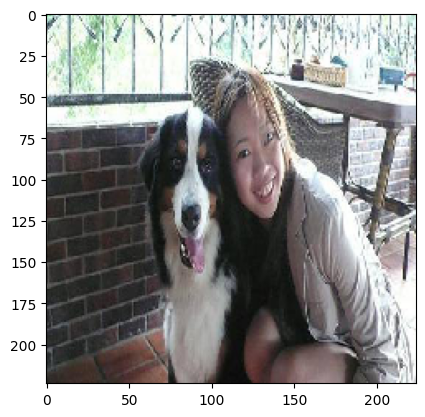

Originally :  scottish_deerhound
Predicted :  scottish_deerhound


In [21]:
# Plotting image to compare
plt.imshow(X_test[9,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[9])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[9])])

In [1]:
model.save("dog_breed.keras")

NameError: name 'model' is not defined